In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# read data
df = pd.read_table('Perceptron.txt', sep='\t', names=['X1', 'X2', 'y'])
df

,X1,X2,y
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-1.84,-1.13,0
...,...,...,...
95,0.71,2.27,1
96,1.96,0.83,1
97,2.52,1.83,1
98,2.77,2.82,1


In [3]:
# convert pandas series into numpy arrays
X = df[['X1', 'X2']].values
y = df['y'].values

In [4]:
# convert numpy arrays to pytorch tensors
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

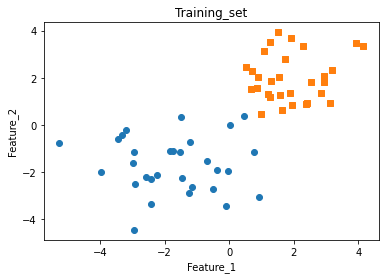

In [6]:
# plot scatter plot on training test
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 1', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 2', marker='s')
plt.title('Training_set')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()

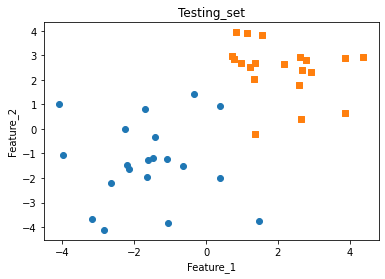

In [7]:
# plot scatter plot on testing test
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 1', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 2', marker='s')
plt.title('Testing_set')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()

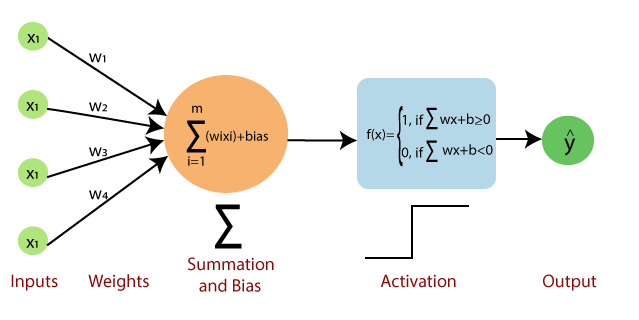

In [8]:
# The Perceptron image
ppn_img = Image(filename='Perceptron.png')
ppn_img 

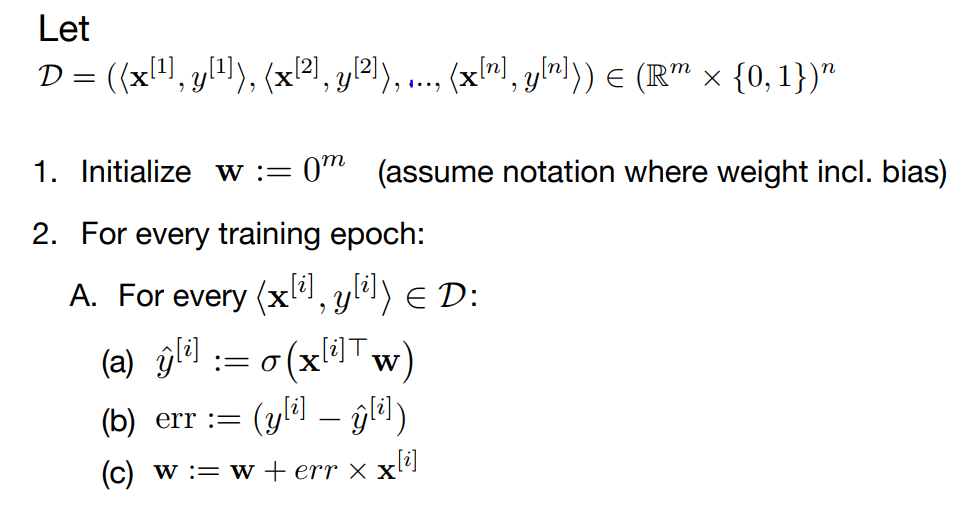

In [9]:
# Learning rule for implementing the Perceptron
ppn_lr = Image(filename='Perceptron_learning_rule.PNG')
ppn_lr 

In [10]:
################
### Perceptron
################

# check device for efficient conputing
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Perceptron():
    # initialize the number of features, weights and bias
    def __init__(self, n_features):
        self.n_features = n_features
        self.weights = torch.zeros(size=(self.n_features, 1), dtype=torch.float64, device=device)
        self.bias = torch.zeros(size=(1,), dtype=torch.float64, device=device)
    
    # wx + b (1)
    def forward(self, x):
        linear = torch.add(torch.matmul(x, self.weights), self.bias)
        predictions = torch.where(linear > 0., 1, 0)
        return predictions
    
    # compute errors (2)
    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors
    
    # for every epoch implement (1) + (2) and update errors
    def fit(self, x, y, epochs):
        for epoch in range(epochs):
            for i in range(len(y)):
                errors = self.backward(x[i].reshape(1, self.n_features), y[i]).reshape(-1)
                self.weights += (errors*x[i]).reshape(self.n_features, 1)
                self.bias = self.bias + errors
    # define "predict" method
    def predict(self, x):
        predictions = self.forward(x).reshape(-1)
        return predictions
    
    # define 'evaluate' method
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions==y)/len(y)
        return accuracy

In [11]:
# using "Perceptron"
ppn = Perceptron(n_features=2)

In [12]:
# train the data
ppn.fit(X_train, y_train, epochs=5)

In [13]:
# make predictions on the testing test
ppn.predict(X_test)

tensor([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [14]:
# model evaluation 
print("Accuracy:", ppn.evaluate(X_test, y_test).item()*100)

Accuracy: 92.5000011920929


In [15]:
ppn.weights

tensor([[1.8400],
        [3.0000]], dtype=torch.float64)

In [16]:
ppn.bias

tensor([-2.], dtype=torch.float64)

In [17]:
w, b = ppn.weights, ppn.bias

In [18]:
x0_min = -3
x1_min = ( (-(w[0] * x0_min) - b[0]) / w[1] )

x0_max = 5
x1_max = ( (-(w[0] * x0_max) - b[0])  / w[1] )

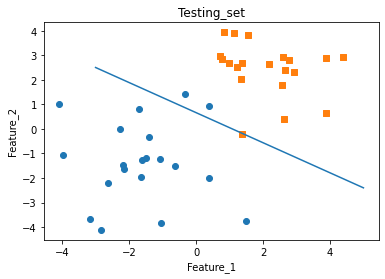

In [19]:
# plot decision boundary on the testing set
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 1', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 2', marker='s')
plt.title('Testing_set')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.plot([x0_min, x0_max], [x1_min, x1_max])
plt.show()